<a href="https://colab.research.google.com/github/arpita20027/MongoDB-Lab1/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes (1).csv to diabetes (1) (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:

data = pd.read_csv('diabetes (1) (1).csv')

print(data.head())
print(data.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[120  31]
 [ 30  50]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy Score: 0.7359307359307359


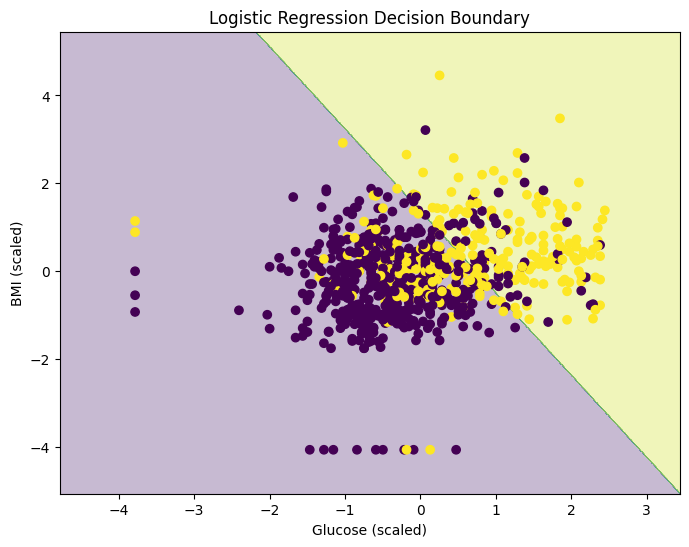

In [ ]:

X_vis = data[['Glucose', 'BMI']]
y_vis = data['Outcome']

scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

model_vis = LogisticRegression()
model_vis.fit(X_vis_scaled, y_vis)


x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis)
plt.xlabel('Glucose (scaled)')
plt.ylabel('BMI (scaled)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

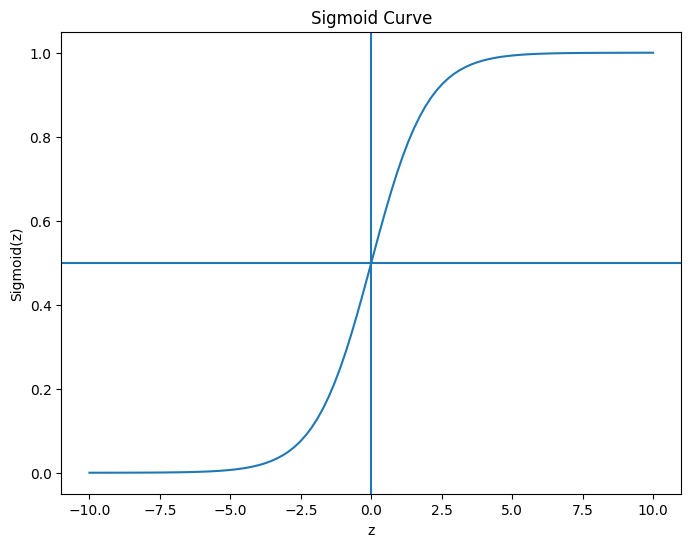

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values
z = np.linspace(-10, 10, 100)
y = sigmoid(z)

# Plot
plt.figure(figsize=(8,6))
plt.plot(z, y)
plt.axhline(0.5)
plt.axvline(0)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Curve")
plt.show()

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:

data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [20000, 30000, 40000, 50000, 60000]
}

df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

Original Dataset:
   Age  Salary
0   25   20000
1   30   30000
2   35   40000
3   40   50000
4   45   60000


In [ ]:

print("Mean before scaling:")
print(df.mean())

print("\nStandard Deviation before scaling:")
print(df.std())

Mean before scaling:
Age          35.0
Salary    40000.0
dtype: float64

Standard Deviation before scaling:
Age           7.905694
Salary    15811.388301
dtype: float64


In [ ]:

scaler = StandardScaler()

In [ ]:

scaler.fit(df)

StandardScaler()

In [ ]:

scaled_data = scaler.transform(df)

In [ ]:

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Scaled Dataset:")
print(scaled_df)

Scaled Dataset:
        Age    Salary
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


In [ ]:

print("Mean after scaling:")
print(scaled_df.mean())

print("\nStandard Deviation after scaling:")
print(scaled_df.std())

Mean after scaling:
Age       0.000000e+00
Salary   -4.440892e-17
dtype: float64

Standard Deviation after scaling:
Age       1.118034
Salary    1.118034
dtype: float64
